In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

insurance = pd.read_csv('insurance.csv')
insurance.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [23]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [24]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

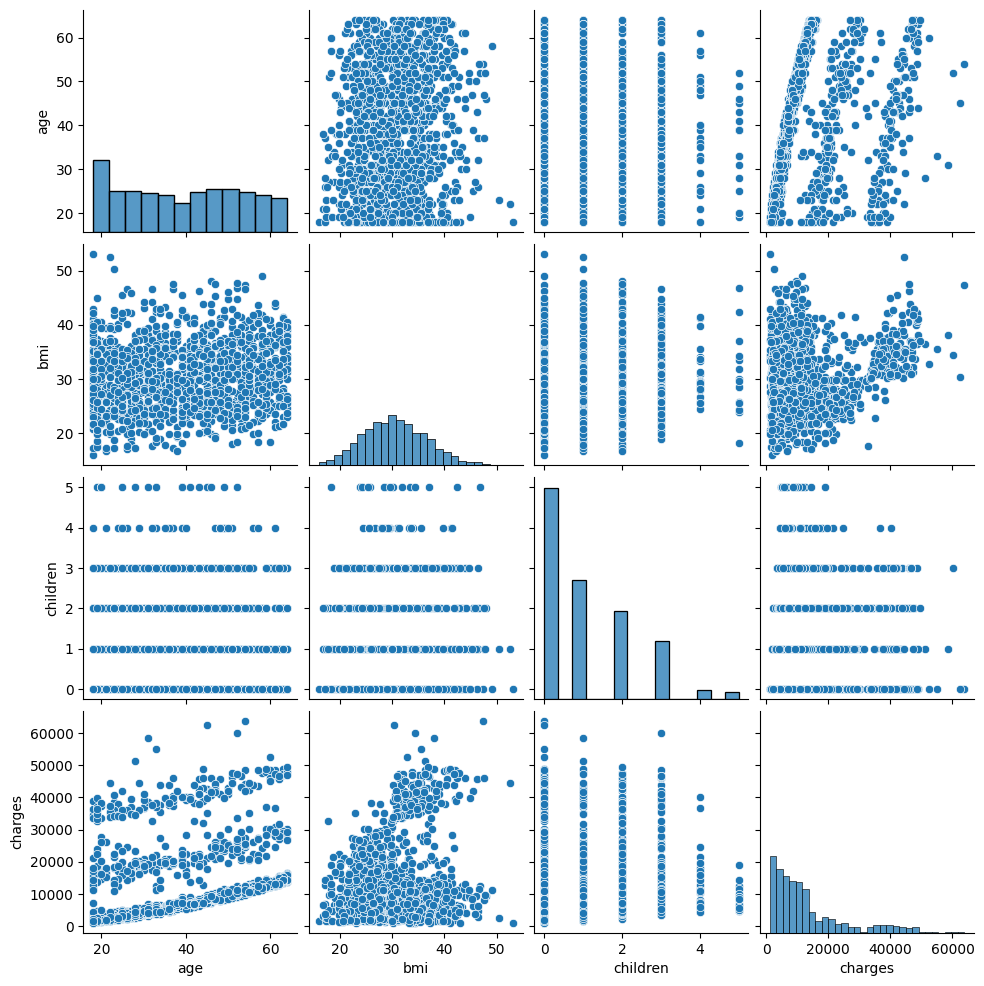

In [25]:
#Statystyki opisowe
sns.pairplot(insurance)

C:\Users\HP\AppData\Local\Temp\ipykernel_16948\1857148107.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['age'])


<Axes: xlabel='age', ylabel='Density'>

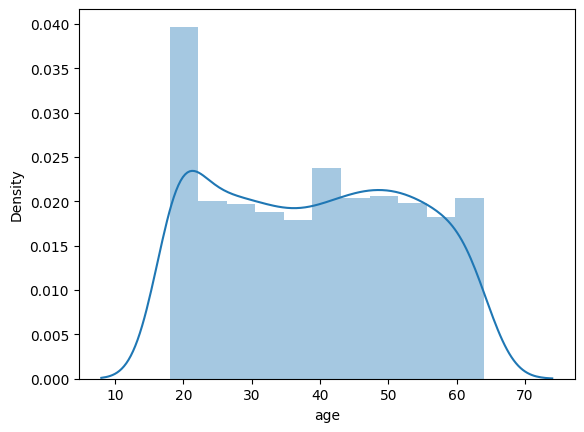

In [26]:
#rozkład zmiennej age
sns.distplot(insurance['age'])

C:\Users\HP\AppData\Local\Temp\ipykernel_16948\716535417.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['bmi'])


<Axes: xlabel='bmi', ylabel='Density'>

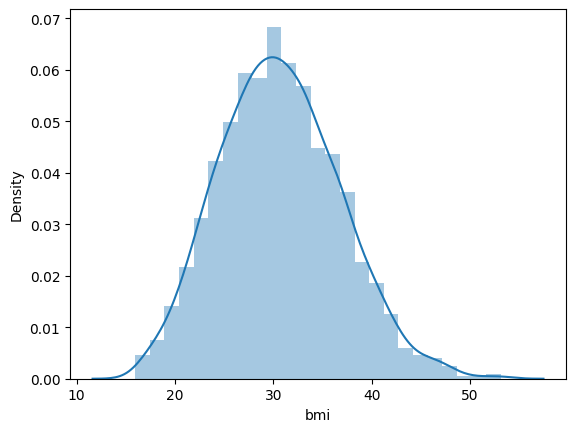

In [ ]:
#rozkład zmiennej bmi
sns.distplot(insurance['bmi'])

C:\Users\HP\AppData\Local\Temp\ipykernel_16948\2126353022.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['children'])


<Axes: xlabel='children', ylabel='Density'>

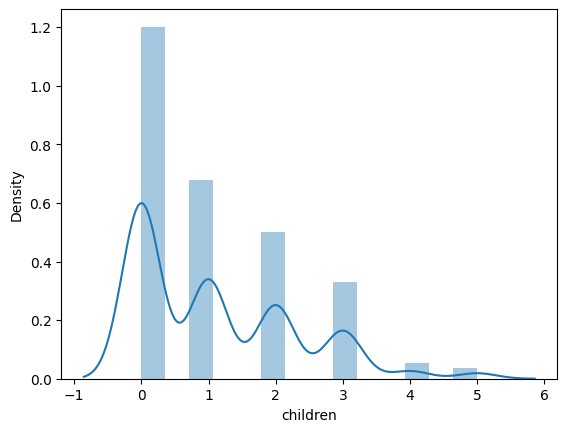

In [ ]:
#rozkład zmiennej children
sns.distplot(insurance['children'])

C:\Users\HP\AppData\Local\Temp\ipykernel_16948\469932853.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['charges'])


<Axes: xlabel='charges', ylabel='Density'>

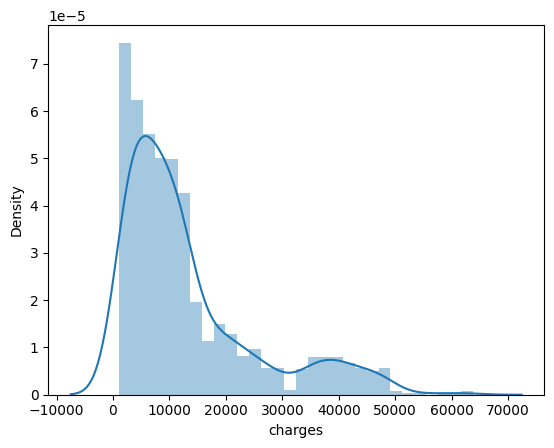

In [ ]:
#rozkład zmiennej charges
sns.distplot(insurance['charges'])

<Axes: >

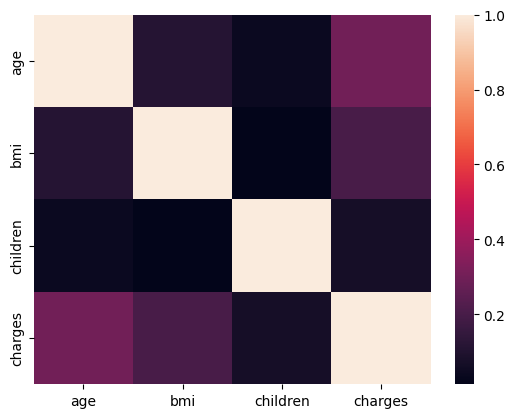

In [ ]:
#Korelacja zmiennych
numeric_df = insurance.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr())

In [41]:
#Zakresy X i y
X = insurance[['bmi','children','age']]
y = insurance['charges']

In [58]:

from sklearn.model_selection import train_test_split
#określamy wielkość zbioru uczącego i testowego oraz random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lm = LinearRegression()

In [45]:
lm.fit(X_train,y_train)

LinearRegression()

Ocena modelu

In [46]:
# wartość wyrazu wolnego w modelu regresji liniowej
print(lm.intercept_)

-6111.26565027703


In [48]:
#współczynniki regresji wytrenowanego modelu
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
bmi,364.394161
children,614.749557
age,206.100871


Interpretacja
BMI - Dla każdej jednostki wzrostu BMI, oczekiwane wartości zmiennej zależnej (w tym przypadku 'charges') wzrastają o 364.39 jednostek
Children - Dla każdego dodatkowego dziecka, oczekiwane wartości zmiennej zależnej wzrastają o 614.75 jednostek
Age - Dla każdego dodatkowego roku życia, oczekiwane wartości zmiennej zależnej wzrastają o 206.10 jednostek


PROGNOZY

In [49]:
predictions = lm.predict(X_test)

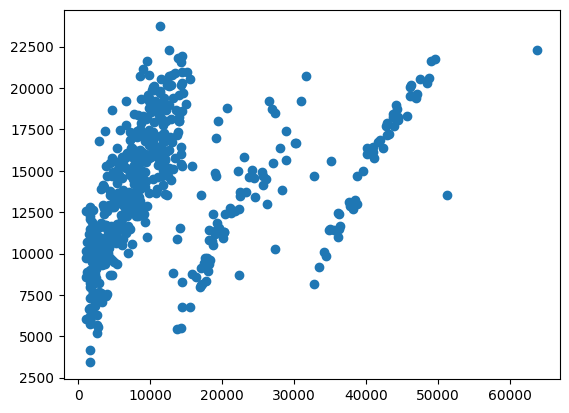

In [50]:
plt.scatter(y_test,predictions)

model jest słabo dopaspwany do danych a przewidywane wartości składki znacznie różnią się od wartości rzczywistych

C:\Users\HP\AppData\Local\Temp\ipykernel_16948\1326397652.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


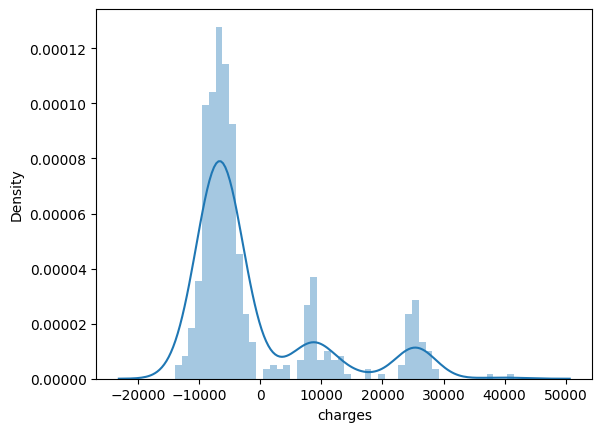

In [55]:
#Histogram resztkowy; można zaobserwować 3 wartości wokół których skupiają się składki; dookoła tych wartości rozkład przypomina normalny z wysoką kurtozą
sns.distplot((y_test-predictions),bins=50);

Mierniki oceny regresji MAE, MSE, RMSE

In [56]:
from sklearn import metrics

In [57]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 8871.810021899631
MSE: 117478452.36075617
RMSE: 10838.747730284906


MAE: Średni bezwzględny błąd między przewidywanymi a rzeczywistymi wartościami wynosi około 8871 jednostek (w jednostkach zmiennej zależnej)
MSE: Średni kwadratowy błąd między przewidywanymi a rzeczywistymi wartościami wynosi około 117 milionów jednostek kwadratowych (w kwadratach jednostek zmiennej zależnej)
RMSE: Średni pierwiastek kwadratowy błędu między przewidywanymi a rzeczywistymi wartościami wynosi około 10,838 jednostek (w jednostkach zmiennej zależnej)

Model zbudowany za pomocą statmodels

In [69]:
pip install statsmodels

  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/a5/59/a4c19b49684ca2a469d7cd1a5682950e327c95c68e13aeea15533e576a8e/statsmodels-0.14.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for patsy>=0.5.2 from https://files.pythonhosted.org/packages/29/ab/373449d6f741732f94e2d15d116a90f050b2857cb727b26d2f7bead50815/patsy-0.5.4-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.1 MB 1.6 MB/s eta 0:00:06
    --------------------------------------- 0.2/9.1 MB 2.4 MB/s eta 0:00:04
   - -------------------------------------- 0.3/9.1 MB 3.2 MB/s eta 0:00:03
   -- ------------------------------------- 0.6/9.1 MB 3.5 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/9.1 MB 3.8 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/9.1 MB 4.0 MB/s eta 0:00:03
   ----- ---------------------------------- 1.2/9.1 


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [70]:
import statsmodels.api as sm
model=sm.OLS(y_train, X_train)
results=model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.595
Model:                            OLS   Adj. R-squared (uncentered):              0.594
Method:                 Least Squares   F-statistic:                              391.8
Date:                Sun, 03 Dec 2023   Prob (F-statistic):                   1.89e-156
Time:                        23:52:25   Log-Likelihood:                         -8655.9
No. Observations:                 802   AIC:                                  1.732e+04
Df Residuals:                     799   BIC:                                  1.733e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

niskie R kwadrat słabo dopasowany model
zmienna dzieci nieisotna statystycznie
Brak normalności reszt (wysoka statystyka JB)